# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.


Описание данных:
Данные геологоразведки трёх регионов находятся в файлах: 

/datasets/geo_data_0.csv.
/datasets/geo_data_1.csv. 
/datasets/geo_data_2.csv. 

id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек;
product — объём запасов в скважине (тыс. баррелей).

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

## 1. Загрузка и подготовка данных

Загрузим данные по трем регионам добычи нефти из трех датафреймов, выведем информацию о датафреймах

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv("C:/Users/chern/geo_data_0.csv")
    
display(data_0.head(10))
display(data_0.info())

try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv("C:/Users/chern/geo_data_1.csv")
    
display(data_1.head(10))
display(data_1.info())

try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv("C:/Users/chern/geo_data_2.csv")
    
display(data_2.head(10))
display(data_2.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Проверим данные на наличие явных дубликатов

In [3]:
display(data_0.duplicated().sum())
display(data_1.duplicated().sum())
display(data_2.duplicated().sum())

0

0

0

Проверим данные на наличие неявных дубликатов и удалим их

In [4]:
display(data_0[data_0.duplicated('id')].count())
display(data_0[data_0.duplicated('id')])

display(data_1[data_1.duplicated('id')].count())
display(data_1[data_1.duplicated('id')])

display(data_2[data_2.duplicated('id')].count())
display(data_2[data_2.duplicated('id')])

id         10
f0         10
f1         10
f2         10
product    10
dtype: int64

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


id         4
f0         4
f1         4
f2         4
product    4
dtype: int64

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


id         4
f0         4
f1         4
f2         4
product    4
dtype: int64

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Удалим незначимый для обучения моделей столбец id 

In [5]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)
data_0.shape
data_1.shape
data_2.shape

(100000, 4)

Посмотрим на распределение данных в датафрейймах на гистограммах

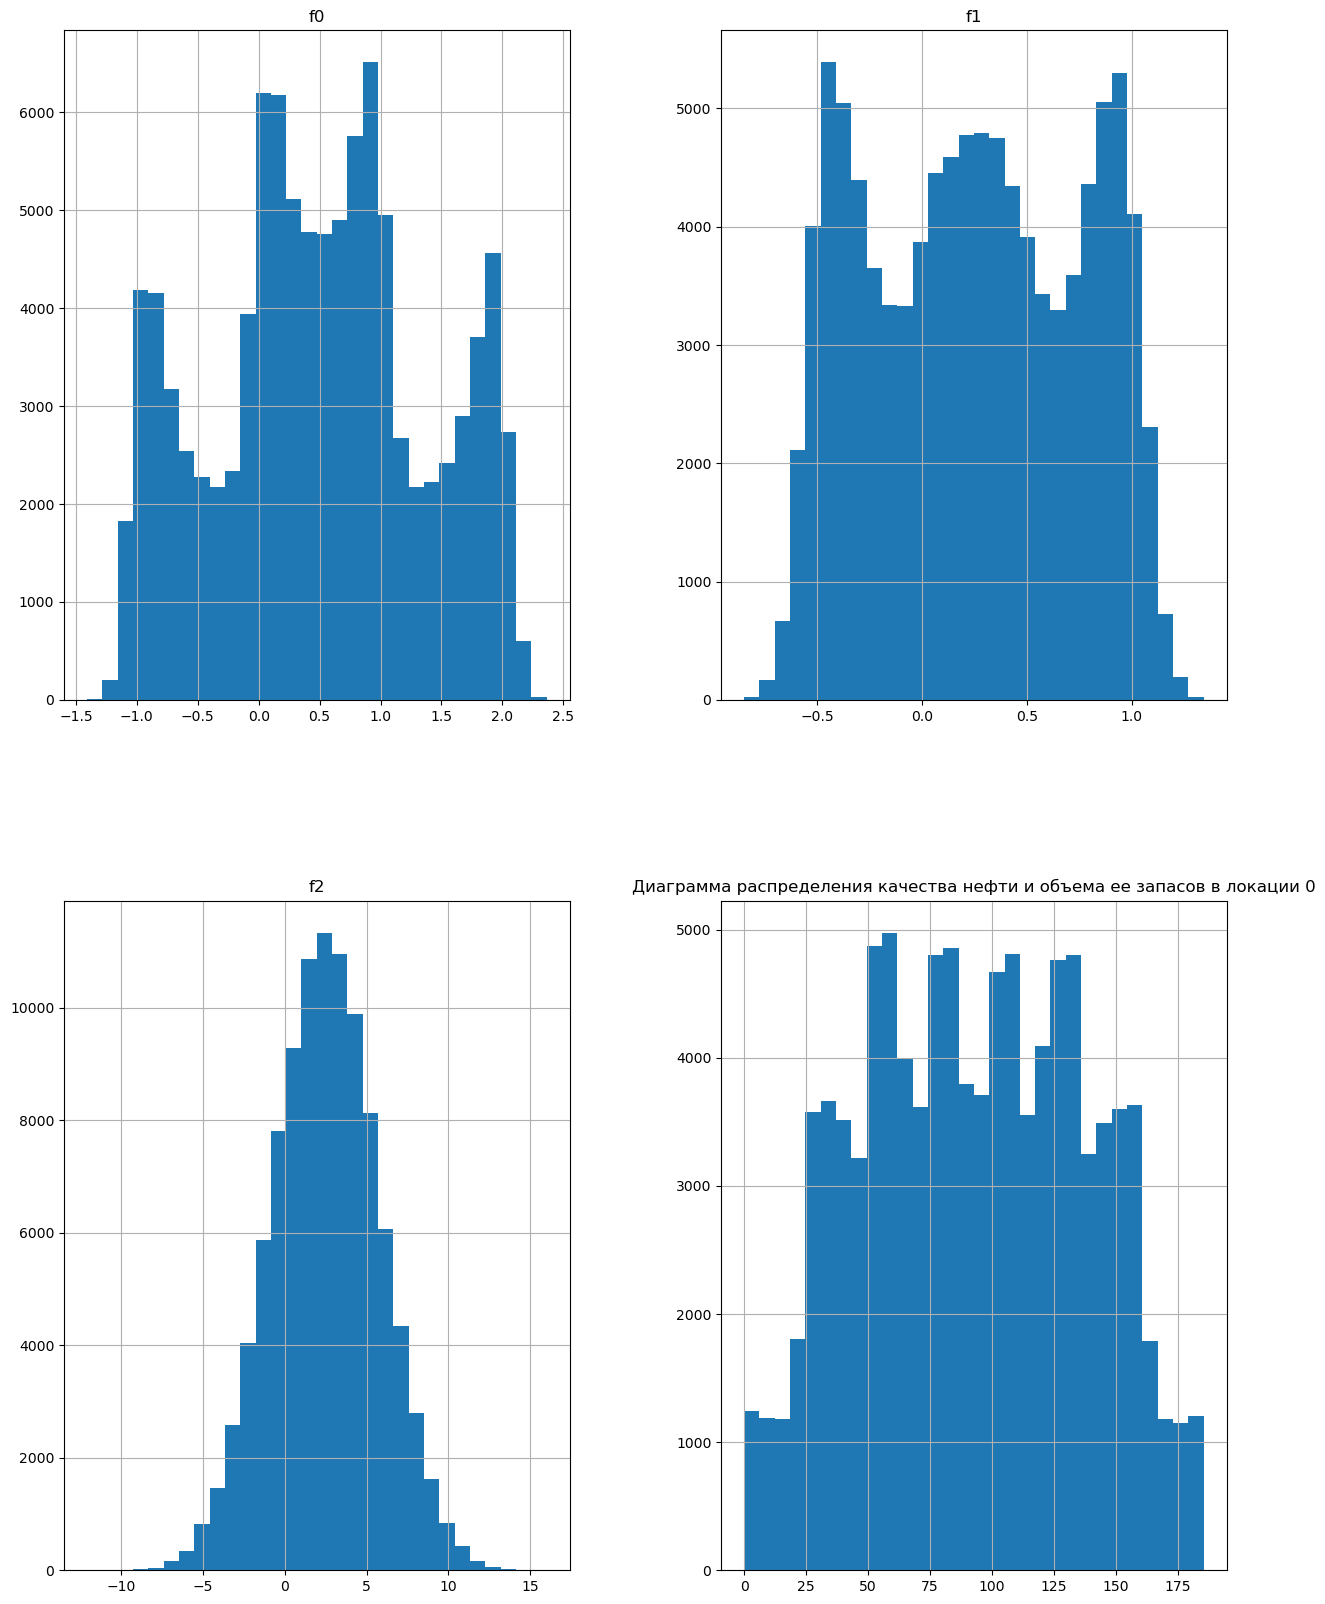

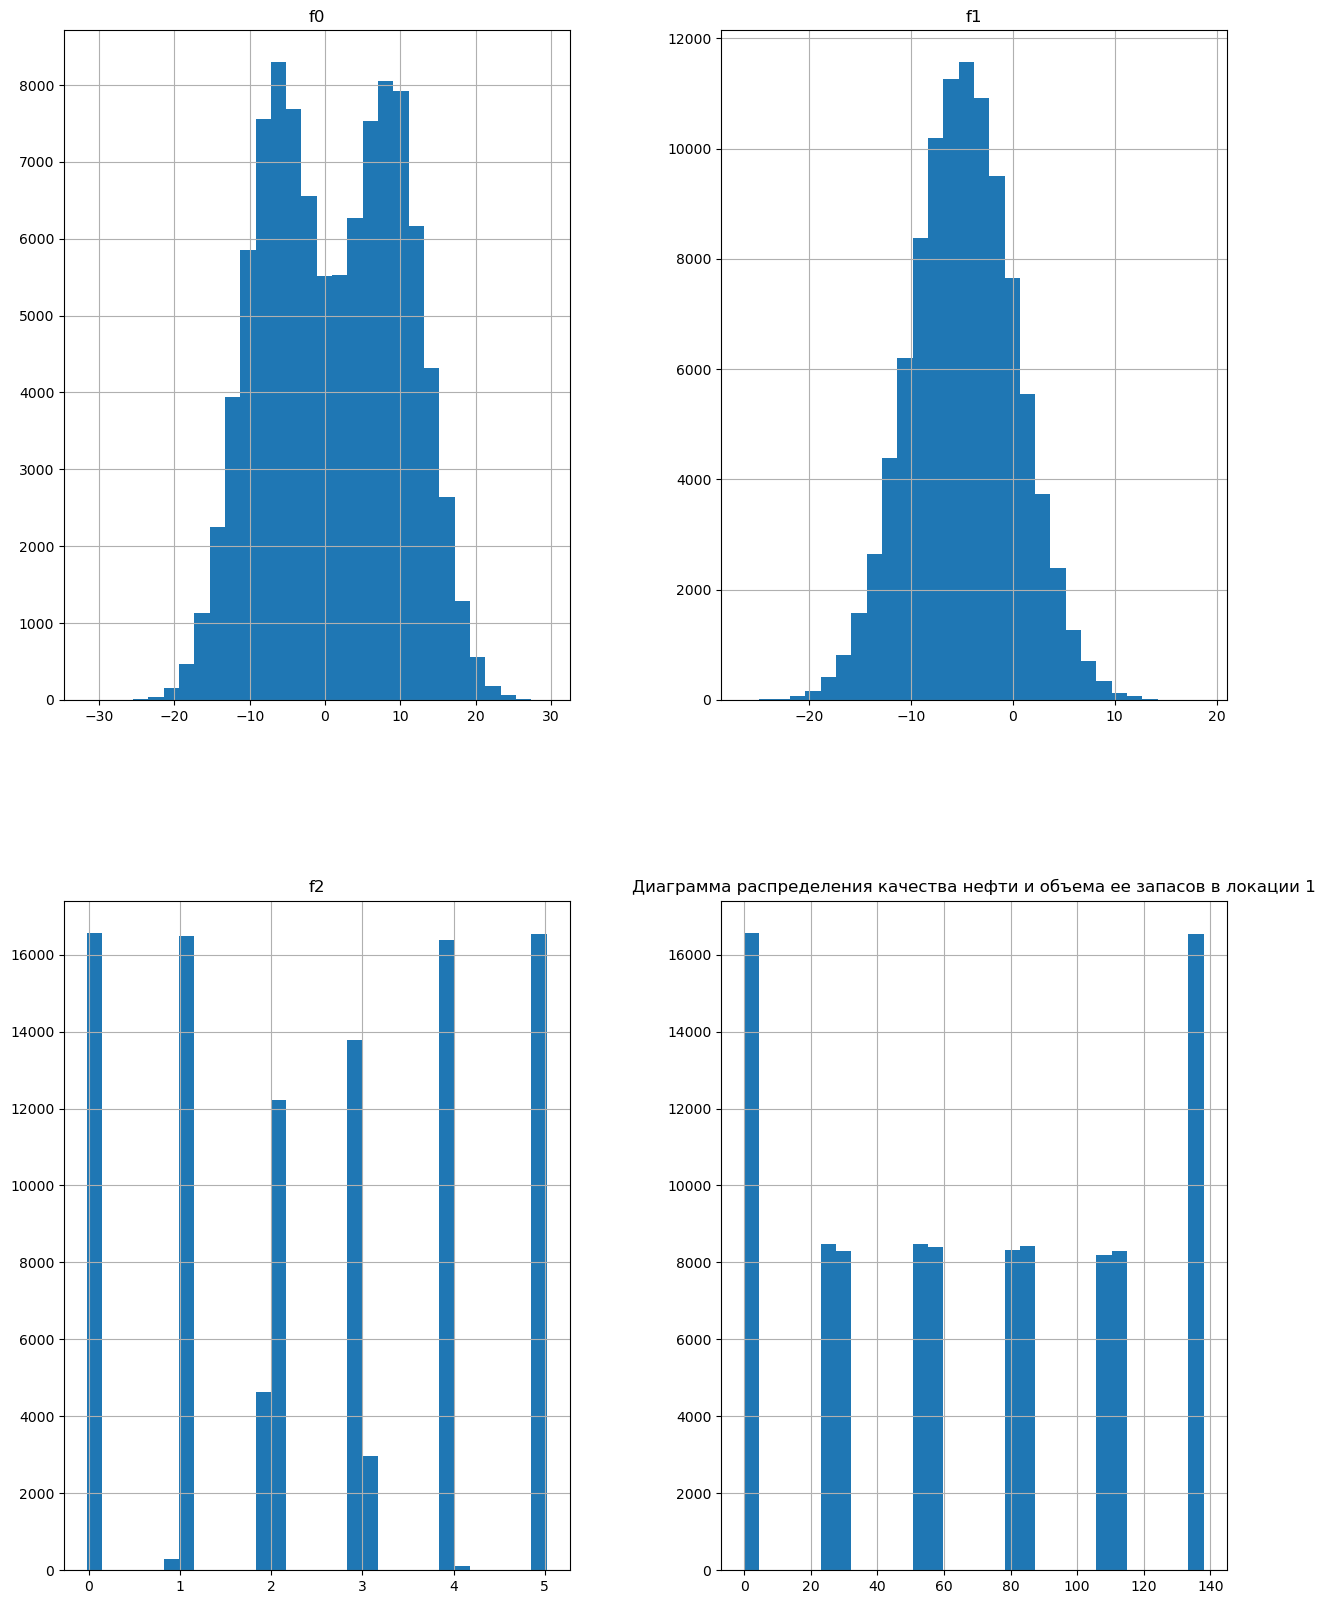

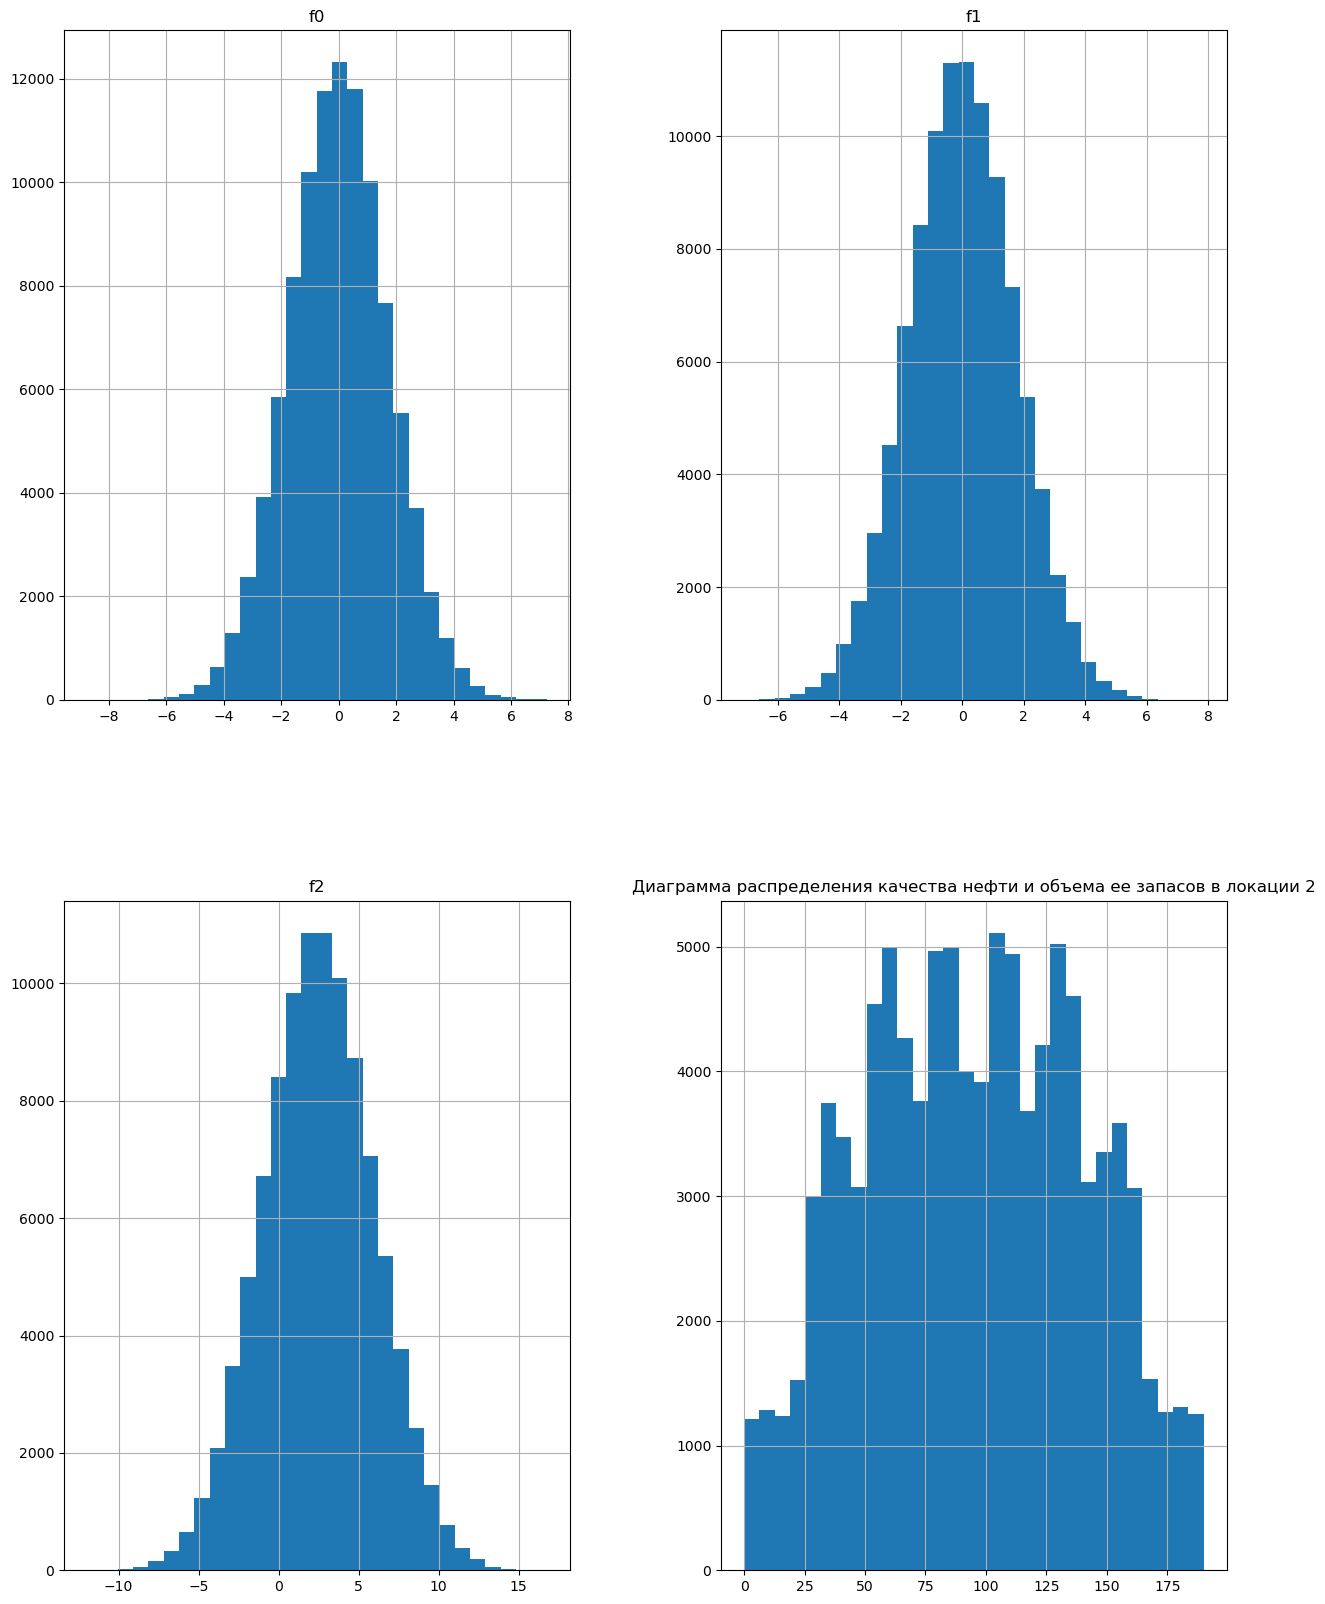

In [6]:
data_0.hist(figsize=(15, 20), bins=30)
plt.title('Диаграмма распределения качества нефти и объема ее запасов в локации 0')
plt.show();

data_1.hist(figsize=(15, 20), bins=30)
plt.title('Диаграмма распределения качества нефти и объема ее запасов в локации 1')
plt.show();

data_2.hist(figsize=(15, 20), bins=30)
plt.title('Диаграмма распределения качества нефти и объема ее запасов в локации 2')
plt.show();

Рассмотрим корреляцию признаков на хитмапе, чтобы исключить проблему мультиколлинеарности

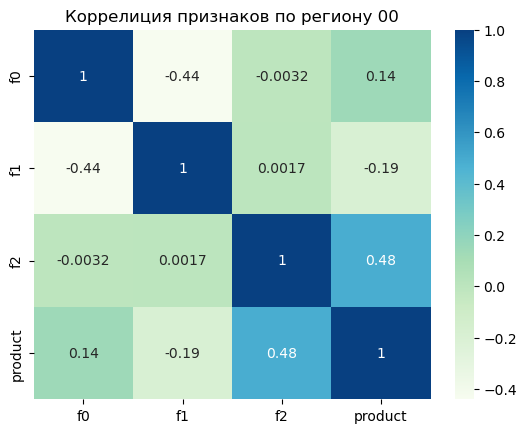

In [7]:
sns.heatmap(data_0.corr(), annot=True, cmap='GnBu')
plt.title('Коррелиция признаков по региону 00', fontsize=12);

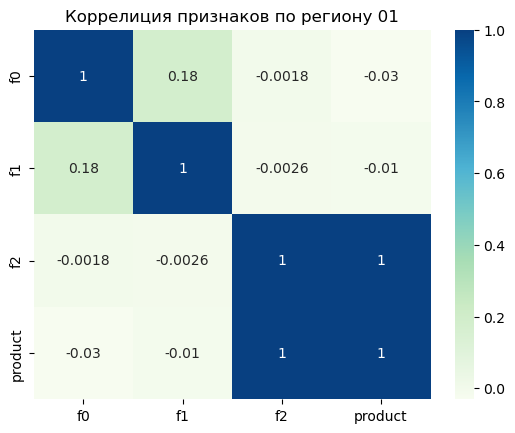

In [8]:
sns.heatmap(data_1.corr(), annot=True, cmap='GnBu')
plt.title('Коррелиция признаков по региону 01', fontsize=12);

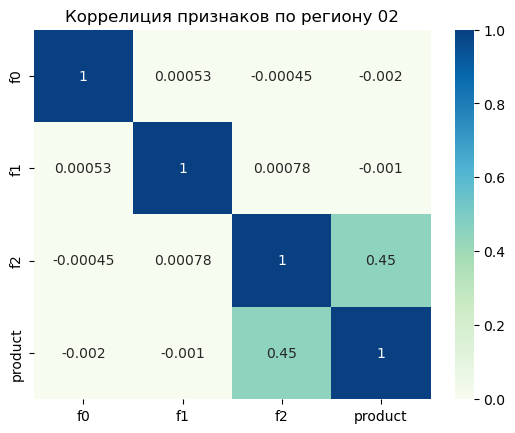

In [9]:
sns.heatmap(data_2.corr(), annot=True, cmap='GnBu')
plt.title('Коррелиция признаков по региону 02', fontsize=12);

**Вывод:**
- Ошибочных типов данных и неявных дубликатов не обнаружено.
- Удален незначимый для обучения моделей столбец id.
- Не все данные распределены нормально или близко к нормальному распределению.
- Мультиколлинеарность не наблюдается.

## 2. Обучение и проверка модели

Выделим целевой признак в данных, разделим данные на обучающую и валидационные выборки в соотношении 75\25

In [10]:
R_STATE = 12345

In [11]:
def test_split(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=R_STATE)
    
    return features_train, features_valid, target_train, target_valid

In [12]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = test_split(data_0, 'product')
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(data_1, 'product')
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(data_2, 'product')

display(features_train_0.head())
display(features_train_1.head())
display(features_train_2.head())

,f0,f1,f2
27212,0.022450,0.951034,2.197333
7866,1.766731,0.007835,6.436602
62041,0.724514,0.666063,1.840177
70185,-1.104181,0.255268,2.026156
82230,-0.635263,0.747990,6.643327


,f0,f1,f2
27212,-6.488552,-1.590478,3.001311
7866,18.819463,4.602079,2.996867
62041,10.816499,-3.919653,1.991077
70185,-12.416362,-9.343774,0.996691
82230,-15.041012,-8.474624,1.996463


,f0,f1,f2
27212,-0.906828,1.339033,1.106789
7866,-1.536353,-0.704673,-1.747632
62041,-1.959584,0.356044,3.528659
70185,2.129734,2.713459,-0.156172
82230,-0.332026,1.515604,5.417583


Стандартизируем численные данные

In [13]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler() 
scaler.fit(features_train_0[numeric]) 
features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

scaler.fit(features_train_1[numeric]) 
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

scaler.fit(features_train_2[numeric]) 
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

display(features_train_0.head())
display(features_train_1.head())
display(features_train_2.head())

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


Снова посмотрим на распределение данных

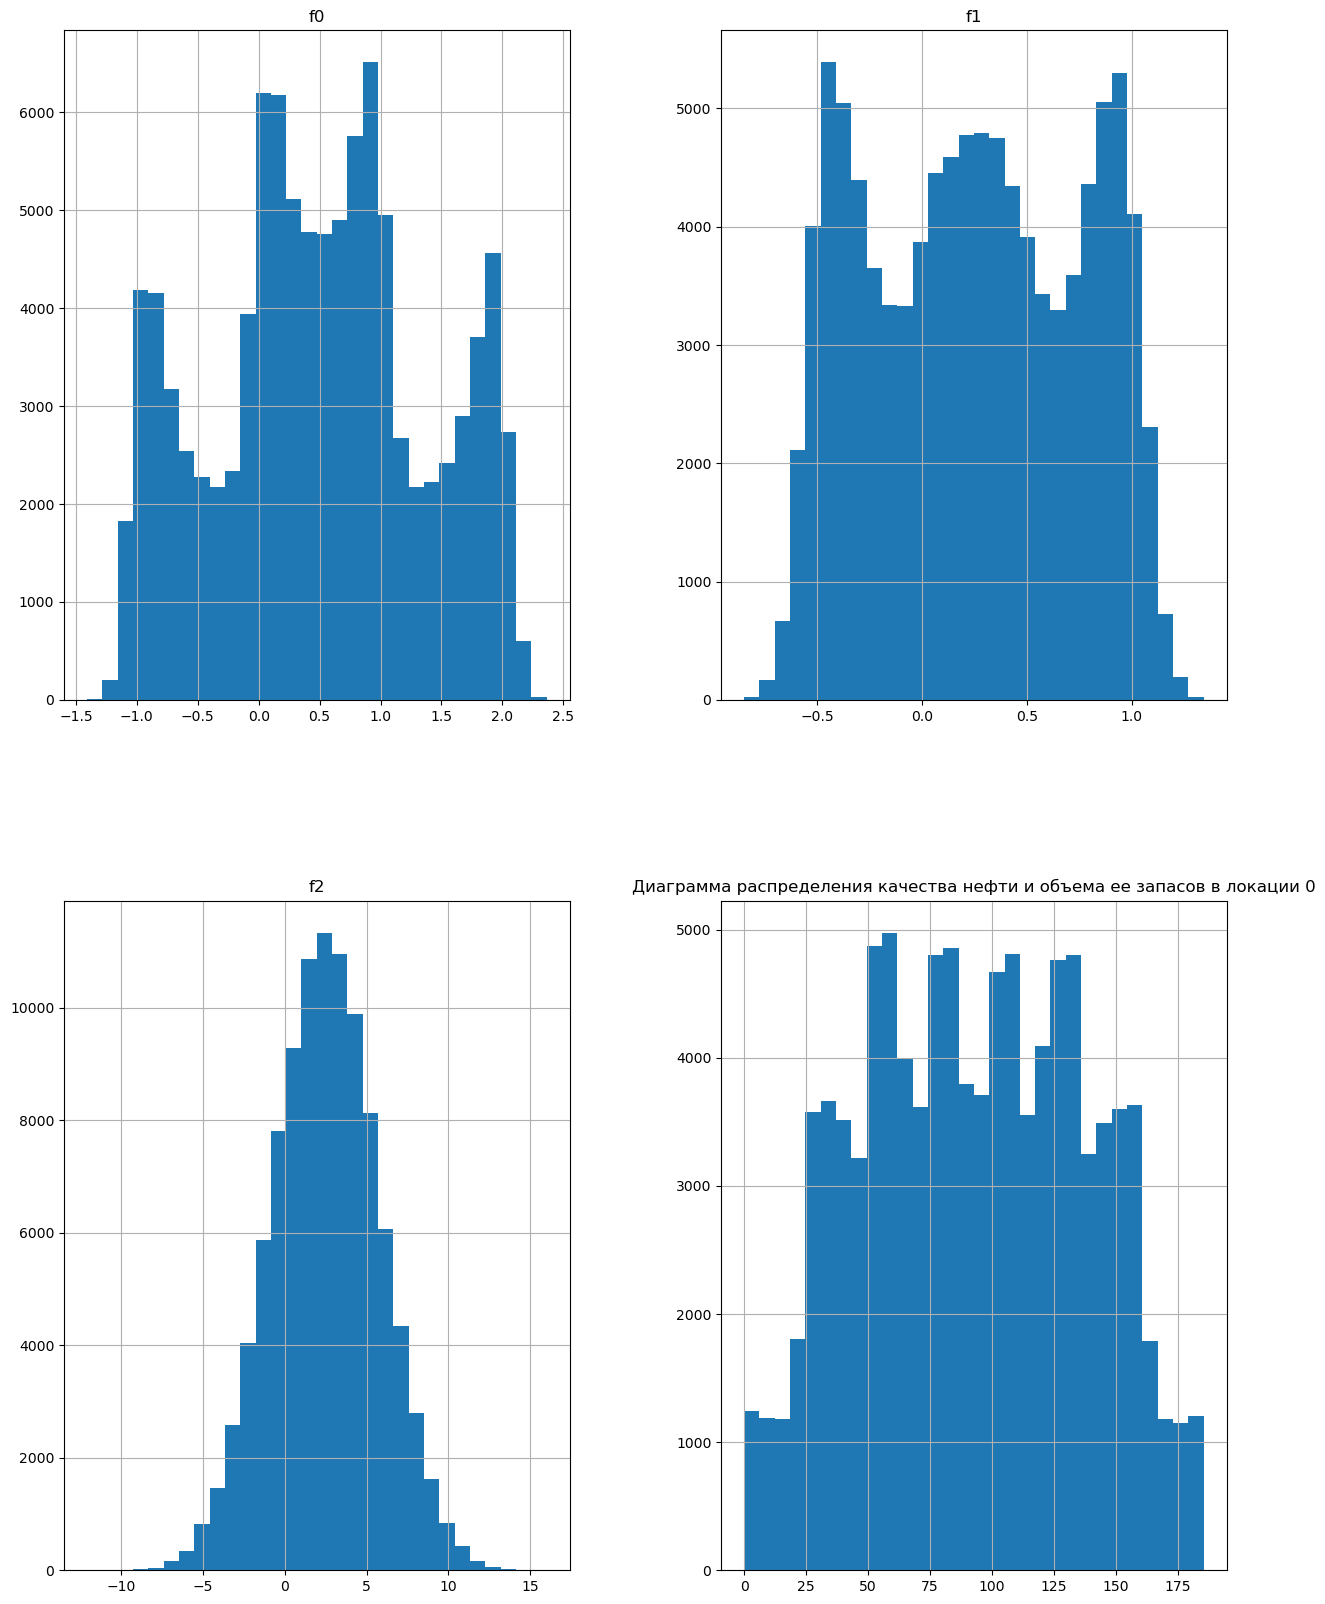

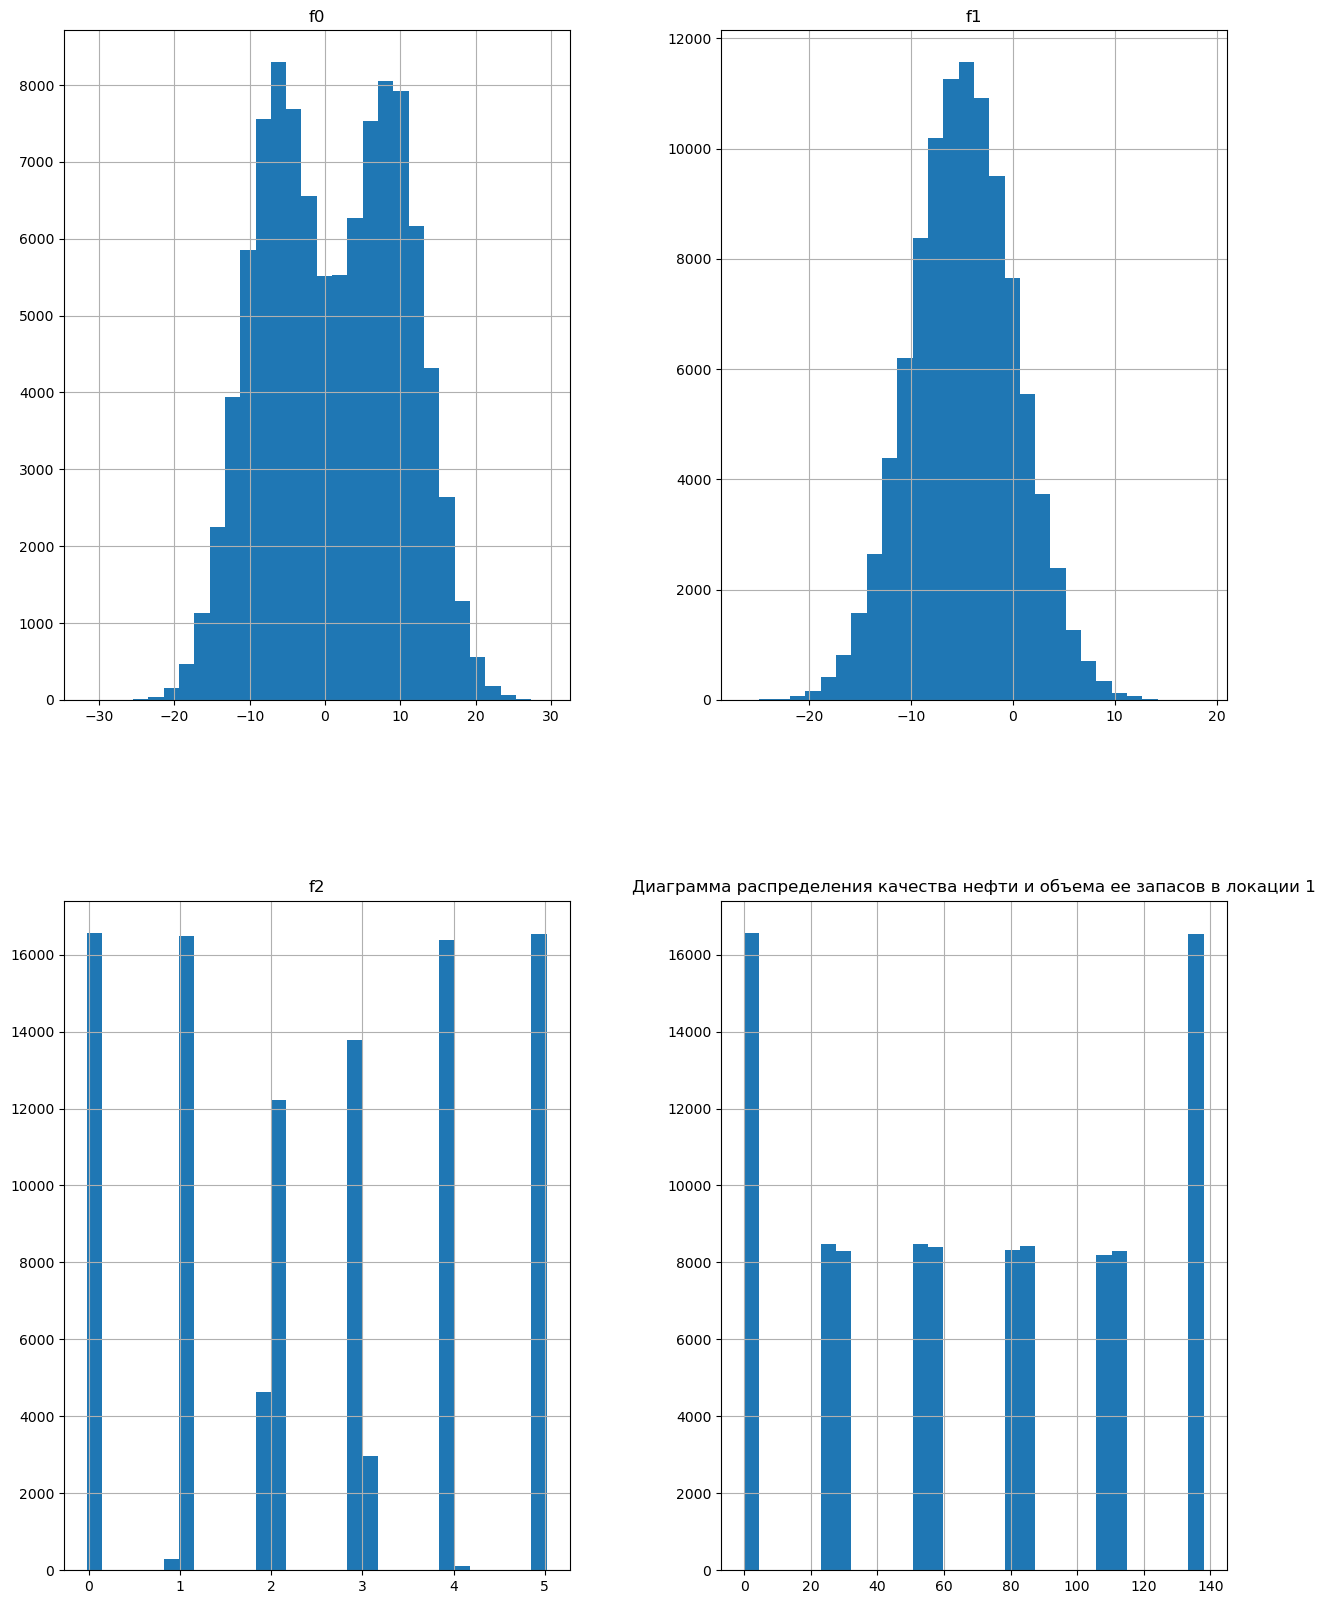

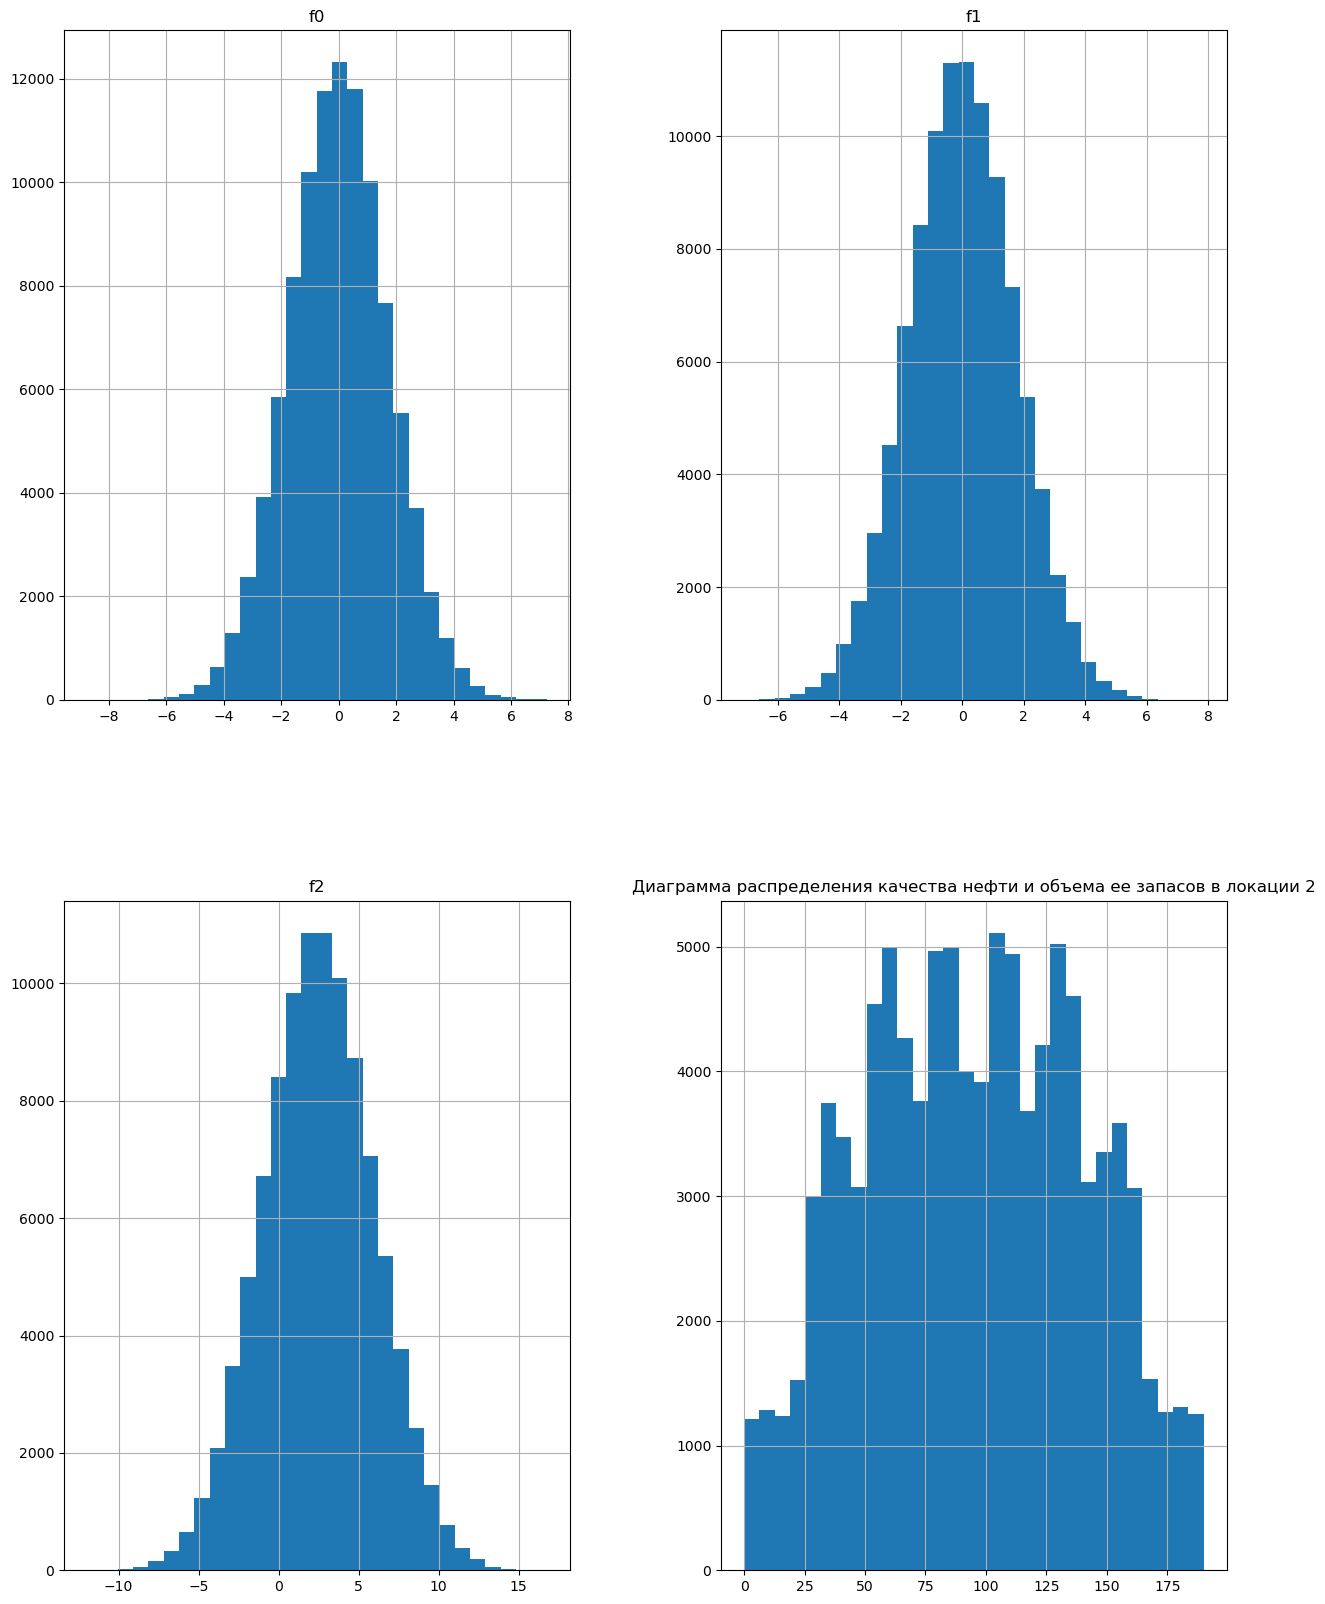

In [14]:
data_0.hist(figsize=(15, 20), bins=30)
plt.title('Диаграмма распределения качества нефти и объема ее запасов в локации 0')
plt.show();

data_1.hist(figsize=(15, 20), bins=30)
plt.title('Диаграмма распределения качества нефти и объема ее запасов в локации 1')
plt.show();

data_2.hist(figsize=(15, 20), bins=30)
plt.title('Диаграмма распределения качества нефти и объема ее запасов в локации 2')
plt.show();

Обучим данные моделью Линейная регрессия

In [15]:
model = LinearRegression()
model.fit(features_train_0, target_train_0) 
predictions_valid_0 = model.predict(features_valid_0) 

result_0 = mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5 

display("RMSE модели линейной регрессии на валидационной выборке:", result_0)
display("Средний запас предсказанного сырья:", predictions_valid_0.mean())

'RMSE модели линейной регрессии на валидационной выборке:'

37.5794217150813

'Средний запас предсказанного сырья:'

92.59256778438035

In [16]:
model = LinearRegression()
model.fit(features_train_1, target_train_1) 
predictions_valid_1 = model.predict(features_valid_1) 

result_1 = mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5

print("RMSE модели линейной регрессии на валидационной выборке:", result_1) 
print("Средний запас предсказанного сырья:", predictions_valid_1.mean())

RMSE модели линейной регрессии на валидационной выборке: 0.8930992867756167
Средний запас предсказанного сырья: 68.728546895446


В связи с высокой корреляцией признаков в данных по региону 01 применим метод регуляризации - Регрессия гребня (L2)

In [17]:
ridgeModelChosen = Ridge(alpha = 0.5) 
ridgeModelChosen.fit(features_train_1, target_train_1) 
  
predictions_valid_1_l2 = ridgeModelChosen.score(features_valid_1, target_valid_1)

"Средний запас предсказанного сырья с регуляризацией:", predictions_valid_1_l2.mean()

('Средний запас предсказанного сырья с регуляризацией:', 0.9996233968594297)

In [18]:
model = LinearRegression()
model.fit(features_train_2, target_train_2) 
predictions_valid_2 = model.predict(features_valid_2) 

result_2 = mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5 

print("RMSE модели линейной регрессии на валидационной выборке:", result_2)
print("Средний запас предсказанного сырья:", predictions_valid_2.mean())

RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434
Средний запас предсказанного сырья: 94.96504596800489


Построим боксплот, чтобы посмотреть на разброс данных и оценить корректность оценки RMSE

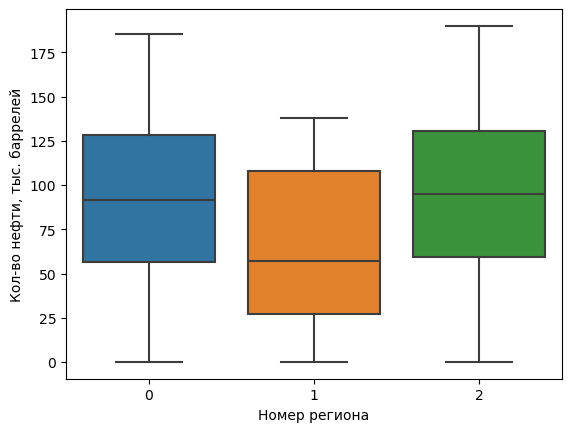

In [19]:
sns.boxplot(data=[data_0['product'], data_1['product'], data_2['product']])
plt.xlabel('Номер региона')
plt.ylabel('Кол-во нефти, тыс. баррелей')
plt.show();

**Вывод:** 
- Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые). Обучили модель. 
- Средний запас предсказанного сырья варьируется по регионам от 69 до 95 тыс. баррелей.
- RMSE модели линейной регрессии на валидационной выборке варьируется от 1 до 40. Хорошая оценка RMSE близкая к 1 только у одного набаро данных - по региону 01, что связано с тем, что два других набора данных имеют большой разброс, что негативно влияет на корректность оценки.
- Лучшие результаты показали данные региона 02.

## 3. Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
Данные ключевые расчеты сохраним в переменных.

In [20]:
BUDGET = 10_000_000_000
FIELDS = 500
BEST_FIELDS = 200
BARREL_PRICE = 450
BARREL_COUNT_PRICE = 450_000

Рассчитайем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе. 

In [21]:
print('Средний запас фактичекой нефти на скважину в регионе 1:', data_0['product'].mean().round())
print('Средний запас фактичекой нефти на скважину в регионе 2:', data_1['product'].mean().round())
print('Средний запас фактичекой нефти на скважину в регионе 3:', data_2['product'].mean().round())

Средний запас фактичекой нефти на скважину в регионе 1: 93.0
Средний запас фактичекой нефти на скважину в регионе 2: 69.0
Средний запас фактичекой нефти на скважину в регионе 3: 95.0


In [22]:
budget_per_field = BUDGET / BEST_FIELDS
print('Бюджет на разработку одной скважины:', budget_per_field,'млн.руб')

Бюджет на разработку одной скважины: 50000000.0 млн.руб


In [23]:
oil_required_amount = budget_per_field / BARREL_COUNT_PRICE
print('Достаточный объём сырья для безубыточной разработки новой скважины:', oil_required_amount,'тыс.баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111 тыс.баррелей


**Вывод:**
- Средний запас фактичекой нефти на скважину в регионе 1: 93 тыс.баррелей
- Средний запас фактичекой нефти на скважину в регионе 2: 69 тыс.баррелей
- Средний запас фактичекой нефти на скважину в регионе 3: 95 тыс.баррелей
- Достаточный объём сырья для безубыточной разработки новой скважины: 111 тыс.баррелей
- Из полученных данных видим, что ни один из представленных регионов не производит достаточный объем сырья для безубыточной разработки новой скважины.

## 4. Расчёт прибыли и рисков 

Выберем скважины с максимальными значениями предсказаний - регион 02. И из них отберем лучшие 200 точек

In [24]:
predictions_valid_2

array([ 93.59963303,  75.10515854,  90.06680936, ...,  99.40728116,
        77.77991248, 129.03241718])

Выберем 200 лучших точек по предсказаниям.
Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.
Рассчитаем прибыль для полученного объёма сырья по региону.

In [47]:
def profit_all_regions(predict, target, count):
    target = target.reset_index(drop=True)
    predict_sorted = pd.Series(predict, index=target.index).sort_values(ascending=False)
    selected_fields = predict_sorted[:count]
    #selected_fields_sum = probs_sorted[:count].sum()
    selected_fields_sum = target[selected_fields.index].sum()


    # КОД РЕВЬЮЕРА, DEBUG:
    if target[selected_fields.index].shape[0] != 200:
        print(f"Shape mismatch! Selected {target[selected_fields.index].shape[0]} target values!")


    profit_regions = (selected_fields_sum * BARREL_COUNT_PRICE) - BUDGET
    return profit_regions
    
print(profit_all_regions(predict=predictions_valid_0, target=target_valid_0, count=BEST_FIELDS))
print(profit_all_regions(predict=predictions_valid_1, target=target_valid_1, count=BEST_FIELDS))
print(profit_all_regions(predict=predictions_valid_2, target=target_valid_2, count=BEST_FIELDS))

3320826043.1398506
2415086696.681511
2710349963.5998325


Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. После оценки рисков оставитм лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.

In [55]:
state = np.random.RandomState(R_STATE)
def bootstrap_all_regions(target, predict):
    predict = pd.Series(predict, index=target.index)
    values=[]
    losses = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=FIELDS)
        predict_sample = predict[target_sample.index]
        profit = profit_all_regions(target=target_sample, predict=predict_sample.values, count=BEST_FIELDS)
        values.append(profit)
    for i in values: 
        if i < 0:
            losses +=1

    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risks = losses / 1000
    
    print('Средняя прибыль:', mean)
    print('С вероятностью 95% прибыль в данном регионе будет составлять от:', lower, 'до', upper)
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(risks))
    return mean, lower, upper, risks

In [56]:
print(bootstrap_all_regions(target=target_valid_0, predict=predictions_valid_0))
print()
print(bootstrap_all_regions(target=target_valid_1, predict=predictions_valid_1))
print()
print(bootstrap_all_regions(target=target_valid_2, predict=predictions_valid_2))

Средняя прибыль: 396164984.8023711
С вероятностью 95% прибыль в данном регионе будет составлять от: -111215545.89049526 до 909766941.5534226
Процент вероятности убытка в данном регионе составит 6.9%
(396164984.8023711, -111215545.89049526, 909766941.5534226, 0.069)

Средняя прибыль: 461155817.2772397
С вероятностью 95% прибыль в данном регионе будет составлять от: 78050810.7517417 до 862952060.2637234
Процент вероятности убытка в данном регионе составит 0.7%
(461155817.2772397, 78050810.7517417, 862952060.2637234, 0.007)

Средняя прибыль: 392950475.17060447
С вероятностью 95% прибыль в данном регионе будет составлять от: -112227625.37857565 до 934562914.5511636
Процент вероятности убытка в данном регионе составит 6.5%
(392950475.17060447, -112227625.37857565, 934562914.5511636, 0.065)


**Вывод:**
В результате полученных данных выявили, что наименьшие риски и наибольшая средняя выручка в регионе 02.

- Средняя прибыль: 461 155 817.28 млн. руб. 
- С вероятностью 95% прибыль в данном регионе будет составлять от: 78 050 810.75 до 862 952 060.26 млн. руб.
- Процент вероятности убытка в данном регионе составит 0.7%

Два других региона не проходят по вероятности убытков не более 2,5%, превышая эту отметку больше, чем в 2 раза.


## 5. Общий вывод

Цель исследования - решить, где бурить новую скважину.

Чтобы ответить на поставленный вопрос, были выполнены следующие шаги и получены выоды:

1) Загружены и изучены данные:
- Ошибочных типов данных и неявных дубликатов не обнаружено.
- Удален незначимый для обучения моделей столбец id.
- Не все данные распределены нормально или близко к нормальному распределению.
- Наблюдается высокая корреляция product и f2 в данных по региону 01. Корреляция равна 1. 

2) Обучены и проверены модели:
- Разбиты данные на обучающую и валидационную выборки в соотношении 75:25.
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые). Обучили модель. 
- Средний запас предсказанного сырья варьируется по регионам от 69 до 95 тыс. баррелей.
- RMSE модели линейной регрессии на валидационной выборке варьируется от 1 до 40.
- Лучшие результаты показали данные региона 02.

3) Проведена подготовка к расчету прибыли по регионам:

Условия рассчетов: При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

- Средний запас фактичекой нефти на скважину в регионе 1: 93 тыс.баррелей
- Средний запас фактичекой нефти на скважину в регионе 2: 69 тыс.баррелей
- Средний запас фактичекой нефти на скважину в регионе 3: 95 тыс.баррелей
- Достаточный объём сырья для безубыточной разработки новой скважины: 111 тыс.баррелей
- Из полученных данных видим, что ни один из представленных регионов не производит достаточный объем сырья для безубыточной разработки новой скважины.

4) Посчитали риски и прибыль:
- Применили технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
- Найшли среднюю прибыль, 95%-й доверительный интервал и риск убытков. 
- После оценки рисков оставили регионы, в которых вероятность убытков меньше 2.5%. 

В результате полученных данных выявили, что наименьшие риски и наибольшая средняя выручка в регионе 02.

- Средняя прибыль: 461 155 817.28 млн. руб. 
- С вероятностью 95% прибыль в данном регионе будет составлять от: 78 050 810.75 до 862 952 060.26 млн. руб.
- Процент вероятности убытка в данном регионе составит 0.7%

Два других региона не проходят по вероятности убытков не более 2,5%, превышая эту отметку больше, чем в 2 раза.



Итоговая рекомендация: лучший регион для разработки скважин - регион 02.